# Qwen-plus

In [1]:
import pandas as pd
import openai
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import argparse
import csv
import os

from _0_prepare_tasks import clean_csv
from _1_translate_tasks import translate_csv
from qwen_plus._2_solve_tasks_qwen import solve_tasks

In [2]:
cleaned_exercises = "topic_areas_cleaned.csv"
translated_exercises_de = "topic_areas_cleaned_de.csv"
translated_exercises_ar = "topic_areas_cleaned_ar.csv"

## Solving Exercises

In [3]:
solved_exercises_en = "qwen_plus/topic_areas_solutions_en.csv"
solved_exercises_de = "qwen_plus/topic_areas_solutions_de.csv"
solved_exercises_ar = "qwen_plus/topic_areas_solutions_ar.csv"

In [4]:
import importlib
import qwen_plus._2_solve_tasks_qwen

importlib.reload(qwen_plus._2_solve_tasks_qwen)
from qwen_plus._2_solve_tasks_qwen import solve_tasks

In [6]:
solve_tasks(cleaned_exercises, solved_exercises_en)
print(f"Solved tasks in English saved to {solved_exercises_en}")

Solving task 1 in English: Draw 10 stars in the box and color 5 of them blue.
Solving task 2 in English: Count the number of apples in the picture and write the total number in the empty circle below.
Solving task 3 in English: Write the numbers from 1 to 20 in order on the lines provided.
Solving task 4 in English: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Solving task 5 in English: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Solving task 6 in English: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Solving task 7 in English: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Solving task 8 in English: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total?
Solving task 9 in English: Liam read 45 pages of his book then finished 22 more pages; how man

In [7]:
solve_tasks(translated_exercises_de, solved_exercises_de, prompt_prefix='Erkläre mir wie ich diese Aufgaben lösen kann')
print(f"Solved tasks in German saved to {solved_exercises_de}")

Solving task 1 in German: Zeichne 10 Sterne in das Kästchen und male 5 davon blau.
Solving task 2 in German: Zähle die Anzahl der Äpfel im Bild und schreibe die Gesamtsumme in den leeren Kreis darunter.
Solving task 3 in German: Schreibe die Zahlen von 1 bis 20 der Reihenfolge nach auf die vorgesehenen Linien.
Solving task 4 in German: Zeichne Linien, um die Zahlen 1 bis 20 mit ihren passenden Punktmustern zu verbinden.
Solving task 5 in German: Umkreise die Zahl, die die gleiche Anzahl von Punkten darunter hat; zum Beispiel, wenn du 5 Punkte siehst, umkreise die Zahl 5.
Solving task 6 in German: Fülle die Lücken mit dem richtigen Zahlensymbol aus, das den auf der Seite gezeigten Punktmustern entspricht.
Solving task 7 in German: Emma hat 24 Äpfel und sie gibt 13 Äpfel an ihre Freundin; wie viele Äpfel hat sie noch?
Solving task 8 in German: Ein Bauer hat 36 Karotten und pflückt weitere 12 Karotten; wie viele Karotten hat er insgesamt?
Solving task 9 in German: Liam hat 45 Seiten seine

In [9]:
solve_tasks(translated_exercises_ar, solved_exercises_ar, prompt_prefix='اشرحلي خطوات حل هذه المسألة')
print(f"Solved tasks in Arabic saved to {solved_exercises_ar}")

Solving task 21 in Arabic: طالب حصل على 85% في اختبار؛ عبّر عن هذه النتيجة ككسر في أبسط صورة.
Solving task 22 in Arabic: إذا كانت قميص يكلف 45 دولارًا وفيه خصم قدره 30%، حدد سعر البيع بالشكل العشري.
Solving task 23 in Arabic: الغواصة على عمق 150 متر تحت سطح البحر؛ إذا ارتفعت 75 متر، ما هو عمقها الجديد؟
Solving task 24 in Arabic: يبدأ متسلق الجبال بالصعود 200 متر ثم ينزل 50 متر؛ ما هو التغير النهائي في ارتفاعه عن مستوى سطح البحر؟
Solving task 25 in Arabic: إذا انخفضت درجة الحرارة من -5 درجات مئوية إلى -12 درجة مئوية في الليل، فكم درجة انخفضت؟
Solving task 26 in Arabic: ترتيب أعمار الأطفال التالية في حفلة عيد الميلاد من الأصغر إلى الأكبر: 8 5 9 7.
Solving task 27 in Arabic: ترجم الوصف التالي للتمرين من الإنجليزية إلى العربية: رتب الدرجات الحرارية التالية من الأبرد إلى الأكثر دفئًا: 35°F 28°F 42°F 30°F.
Solving task 28 in Arabic: قم بترتيب النقاط من مباراة كرة السلة بالترتيب التصاعدي: 45 32 58 27.
Solving task 29 in Arabic: رتب درجات الحرارة التالية من الأبرد إلى الأكثر دفئًا: -5°C 0°C -2

## Pairwise Evaluation

In [4]:
solution_files = {
    "en": solved_exercises_en,
    "de": solved_exercises_de,
    "ar": solved_exercises_ar,
}

technical_terms_files = {
    "en": "technical_terms_en.csv",
    "de": "technical_terms_de.csv",
    "ar": "technical_terms_ar.csv",
}

In [5]:
import importlib
import _7_pairwise_evaluation

importlib.reload(_7_pairwise_evaluation)
from _7_pairwise_evaluation import evaluate_explanations

C:\Users\IuG_Lap1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_results = evaluate_explanations(solution_files, technical_terms_files, current_model='qwen-plus', output_dir="qwen_plus")

pd.set_option('display.max_colwidth', None)  # Ensure long explanations are visible
print(df_results.head())

Evaluating exercise 0... ✅ Saved exercise 0 to CSV.
✅ Saved exercise 1 to CSV.
✅ Saved exercise 2 to CSV.
✅ Saved exercise 3 to CSV.
✅ Saved exercise 4 to CSV.
✅ Saved exercise 5 to CSV.
✅ Saved exercise 6 to CSV.
✅ Saved exercise 7 to CSV.
✅ Saved exercise 8 to CSV.
✅ Saved exercise 9 to CSV.
✅ Saved exercise 10 to CSV.
✅ Saved exercise 11 to CSV.
✅ Saved exercise 12 to CSV.
✅ Saved exercise 13 to CSV.
✅ Saved exercise 14 to CSV.
✅ Saved exercise 15 to CSV.
✅ Saved exercise 16 to CSV.
✅ Saved exercise 17 to CSV.
✅ Saved exercise 18 to CSV.
✅ Saved exercise 19 to CSV.
✅ Saved exercise 20 to CSV.
✅ Saved exercise 21 to CSV.
✅ Saved exercise 22 to CSV.
✅ Saved exercise 23 to CSV.
✅ Saved exercise 24 to CSV.
✅ Saved exercise 25 to CSV.
✅ Saved exercise 26 to CSV.
✅ Saved exercise 27 to CSV.
✅ Saved exercise 28 to CSV.
✅ Saved exercise 29 to CSV.
✅ Saved exercise 30 to CSV.
✅ Saved exercise 31 to CSV.
✅ Saved exercise 32 to CSV.
✅ Saved exercise 33 to CSV.
✅ Saved exercise 34 to CSV.
✅ Sav

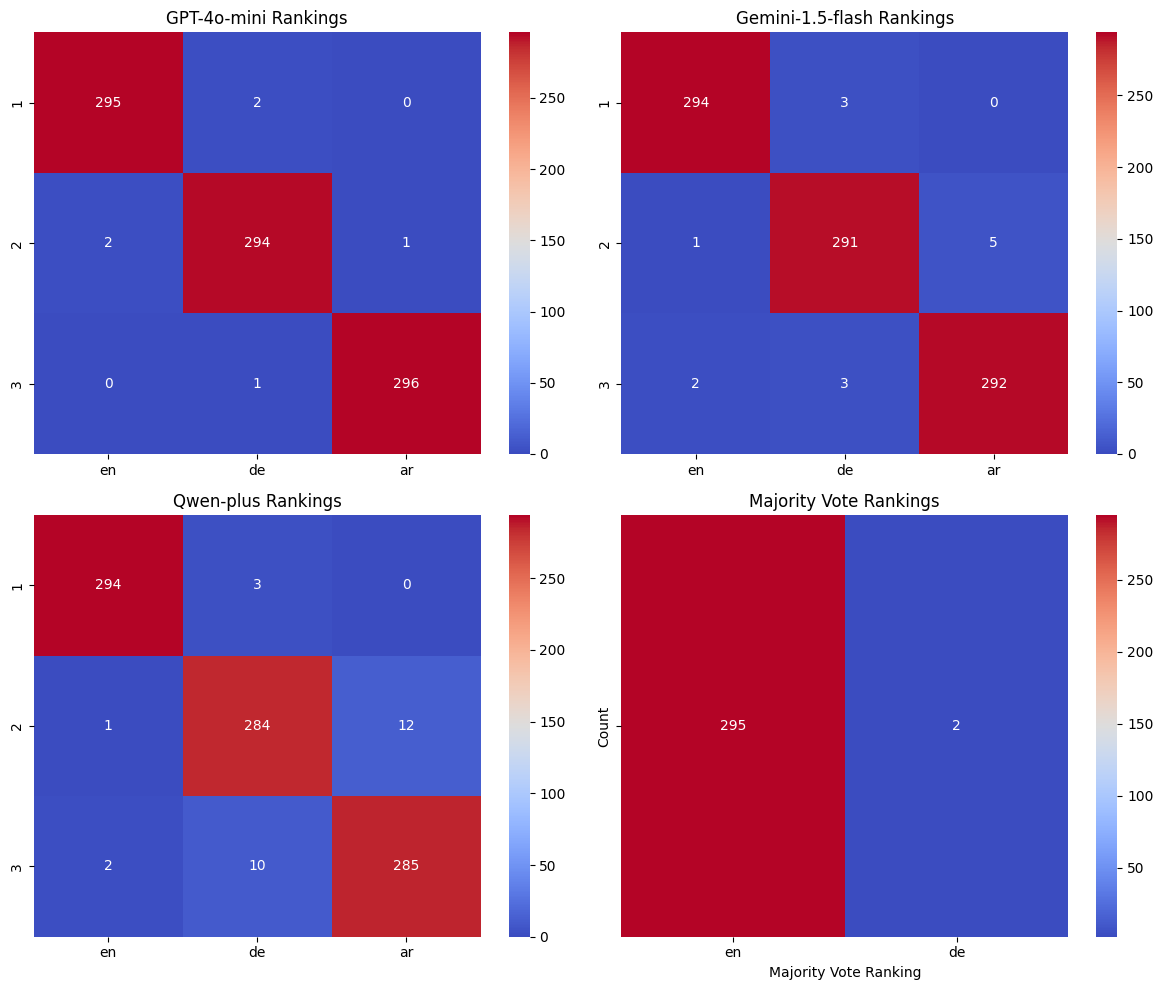

In [8]:
import ast
import re

expected_languages = list(solution_files.keys())  # ['en', 'de', 'ar']

def parse_ranking(ranking_str):
    """
    Converts ranking strings from '[en: 1, de: 2, ar: 3]' into a proper Python dictionary.
    """
    try:
        # Ensure it's a string before processing
        if not isinstance(ranking_str, str):
            return {}

        formatted_str = ranking_str.replace("Lang1", "en").replace("Lang2", "de").replace("Lang3", "ar") 

        #  Convert to dictionary
        ranking_dict = eval(formatted_str)  # Using eval carefully after regex formatting

        # Ensure it returns a dictionary
        if isinstance(ranking_dict, dict):
            return ranking_dict
        else:
            return {}

    except Exception as e:
        print(f"Error parsing ranking: {ranking_str} -> {e}")
        return {}

# Load the evaluation results
df_results = pd.read_csv('qwen_plus/judge_pairwise_evaluation.csv')

# Apply parsing function to rankings
df_results["gpt-4o-mini Ranking"] = df_results["gpt-4o-mini Ranking"].apply(parse_ranking)
df_results["gemini-1.5-flash Ranking"] = df_results["gemini-1.5-flash Ranking"].apply(parse_ranking)
df_results["qwen-plus Ranking"] = df_results["qwen-plus Ranking"].apply(parse_ranking)
# df_results["Majority Vote Ranking"] = df_results["Majority Vote Ranking"].apply(parse_ranking)

# Convert ranking dictionaries into dataframes
gpt_rank_df = pd.DataFrame(df_results["gpt-4o-mini Ranking"].to_list())
gemini_rank_df = pd.DataFrame(df_results["gemini-1.5-flash Ranking"].to_list())
qwen_rank_df = pd.DataFrame(df_results["qwen-plus Ranking"].to_list())
majority_rank_df = pd.DataFrame(df_results["Majority Vote Ranking"].to_list())

# Rename columns based on the expected language keys
gpt_rank_df.columns = expected_languages
gemini_rank_df.columns = expected_languages
qwen_rank_df.columns = expected_languages
# majority_rank_df.columns = expected_languages

# Count how often each language gets each ranking position
gpt_ranking_counts = gpt_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
gemini_ranking_counts = gemini_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
qwen_ranking_counts = qwen_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
# majority_ranking_counts = majority_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)

majority_ranking_counts = df_results["Majority Vote Ranking"].value_counts().to_frame()
majority_ranking_counts.columns = ["Count"]

# Set up the figure layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Heatmaps for individual LLM rankings
sns.heatmap(gpt_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[0, 0])
axes[0, 0].set_title("GPT-4o-mini Rankings")

sns.heatmap(gemini_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[0, 1])
axes[0, 1].set_title("Gemini-1.5-flash Rankings")

sns.heatmap(qwen_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("Qwen-plus Rankings")

# Heatmap for Majority Vote Ranking
sns.heatmap(majority_ranking_counts.T, annot=True, cmap="coolwarm", fmt="d", ax=axes[1, 1])
axes[1, 1].set_title("Majority Vote Rankings")

# Adjust layout
plt.tight_layout()
plt.show()

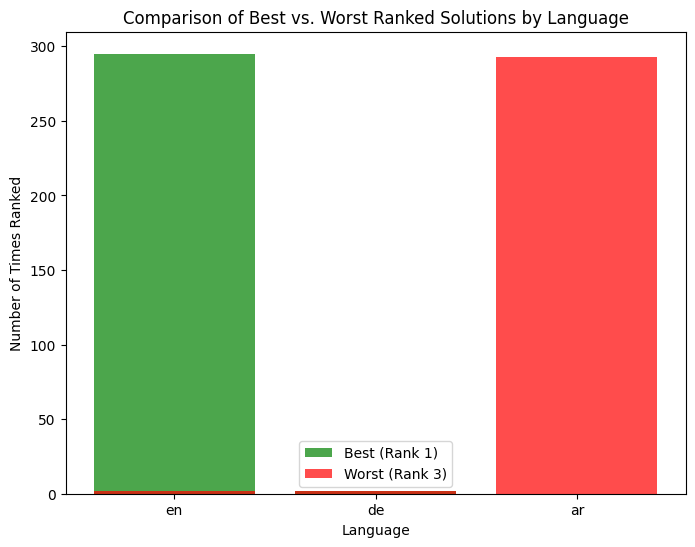

In [9]:
import matplotlib.pyplot as plt

# Count occurrences of each language in best and worst rankings
best_counts = df_results["Best Explanation"].value_counts()
worst_counts = df_results["Worst Explanation"].value_counts()

# Ensure all languages are included (even if they have 0 counts)
languages = list(solution_files.keys())  # ['en', 'de', 'ar']
best_counts = best_counts.reindex(languages, fill_value=0)
worst_counts = worst_counts.reindex(languages, fill_value=0)

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(best_counts.index, best_counts.values, label="Best (Rank 1)", color="green", alpha=0.7)
plt.bar(worst_counts.index, worst_counts.values, label="Worst (Rank 3)", color="red", alpha=0.7)
plt.xlabel("Language")
plt.ylabel("Number of Times Ranked")
plt.title("Comparison of Best vs. Worst Ranked Solutions by Language")
plt.legend()
plt.show()

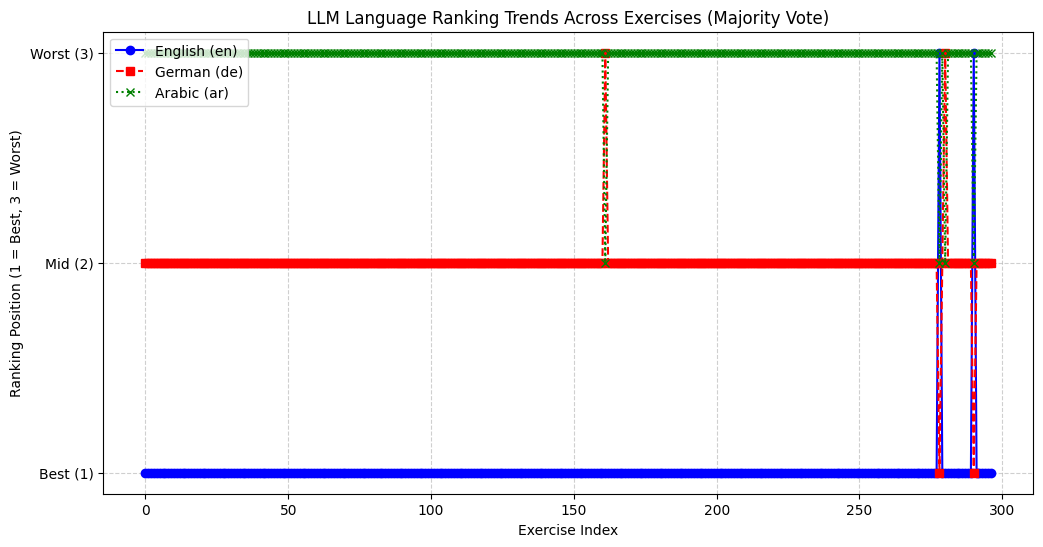

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define models and languages
models = ["gpt-4o-mini", "gemini-1.5-flash", "qwen-plus"]
languages = ["en", "de", "ar"]  # Fixed order for consistency

# Create lists for each language's ranking position across exercises
en_ranking, de_ranking, ar_ranking = [], [], []

# Iterate through all exercises
for _, row in df_results.iterrows():
    majority_best = row["Majority Vote Ranking"]  # The best language from Majority Vote
    if not isinstance(majority_best, str) or majority_best not in languages:
        continue  # Skip if invalid

    # Get the remaining two languages
    remaining_languages = [lang for lang in languages if lang != majority_best]
    if len(remaining_languages) != 2:
        continue  # Skip if incomplete data

    # Collect worst ranking votes across models
    worst_votes = Counter()
    for model in models:
        ranking_value = row.get(f"{model} Ranking", "")

        # Ensure ranking_value is a dictionary (convert string if needed)
        if isinstance(ranking_value, str) and ranking_value.strip().startswith("{"):
            try:
                ranking_dict = eval(ranking_value)  # Convert string to dictionary
            except:
                continue
        elif isinstance(ranking_value, dict):
            ranking_dict = ranking_value
        else:
            continue  # Skip if the value is neither dict nor valid string

        # Ensure ranking_dict contains all three languages
        if len(ranking_dict) < 3:
            continue  # Skip if incomplete ranking

        # Sort by ranking position (1 = best, 3 = worst)
        sorted_langs = sorted(ranking_dict, key=ranking_dict.get)

        if sorted_langs:
            worst_votes[sorted_langs[-1]] += 1  # Worst gets more votes

    # Determine worst language via majority vote
    worst_language = worst_votes.most_common(1)[0][0] if worst_votes else remaining_languages[0]

    # The last remaining language is the mid-ranked one
    mid_language = [lang for lang in remaining_languages if lang != worst_language][0]

    # Assign rankings to fixed language positions
    rank_mapping = {majority_best: 1, mid_language: 2, worst_language: 3}
    en_ranking.append(rank_mapping["en"])
    de_ranking.append(rank_mapping["de"])
    ar_ranking.append(rank_mapping["ar"])

# Plot the ranking trends with fixed colors
plt.figure(figsize=(12, 6))

plt.plot(range(len(en_ranking)), en_ranking, marker="o", linestyle="-", label="English (en)", color="blue")
plt.plot(range(len(de_ranking)), de_ranking, marker="s", linestyle="--", label="German (de)", color="red")
plt.plot(range(len(ar_ranking)), ar_ranking, marker="x", linestyle=":", label="Arabic (ar)", color="green")

plt.xlabel("Exercise Index")
plt.ylabel("Ranking Position (1 = Best, 3 = Worst)")
plt.title("LLM Language Ranking Trends Across Exercises (Majority Vote)")
plt.yticks([1, 2, 3], labels=["Best (1)", "Mid (2)", "Worst (3)"])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()